In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PCA and K-means cluster

In [ ]:
#using breast cancer data from sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [ ]:
scaled_features = scale(features)

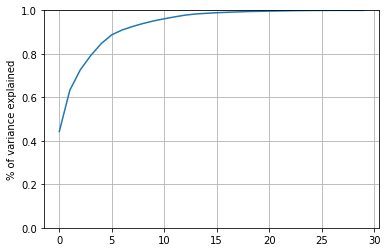

The first two principle components explain 0.6324320765155942 fraction of the total variance
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903]


In [ ]:
#pca to 2 dimensions
pca = PCA()
pca.fit(scaled_features)
var_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_explained)
plt.ylabel("% of variance explained")
plt.ylim((0,1))
plt.grid(True)
plt.show()
print("The first two principle components explain %s fraction of the total variance"
      % var_explained[1])
print(var_explained[:9])

K-Means misclassifies at rate 0.09490333919156413.


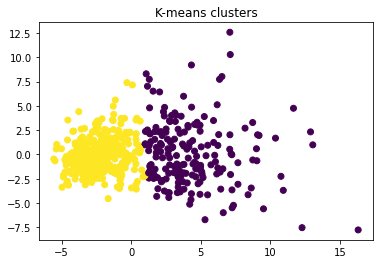

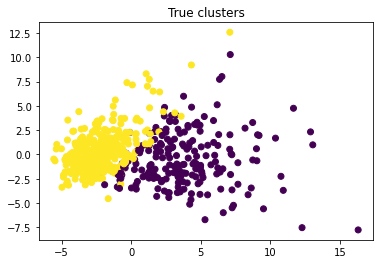

In [ ]:
#K-Means cluster
from sklearn.metrics import zero_one_loss
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

X = pca.transform(scaled_features)
km = KMeans(n_clusters=2, random_state=0).fit(X)
km_groups = km.labels_

if zero_one_loss(cancer.target, km_groups) > 0.5:
    km_groups = 1 - km_groups
km_groups_error = zero_one_loss(cancer.target, km_groups)
print("K-Means misclassifies at rate %s." % km_groups_error)

plt.figure()
plt.title('K-means clusters')
plt.scatter(X[:,0],X[:,1],c=km_groups)
plt.show()

plt.figure()
plt.title('True clusters')
plt.scatter(X[:,0],X[:,1],c=cancer.target)
plt.show()

PCA for image compression

In [ ]:
# using fetch_olivetti_faces image from sklearn dataset
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
face = fetch_olivetti_faces()
print(face.keys())
face_data = face['data']
print(face_data.shape)
face['images'].shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


(400, 64, 64)

<Figure size 432x288 with 0 Axes>

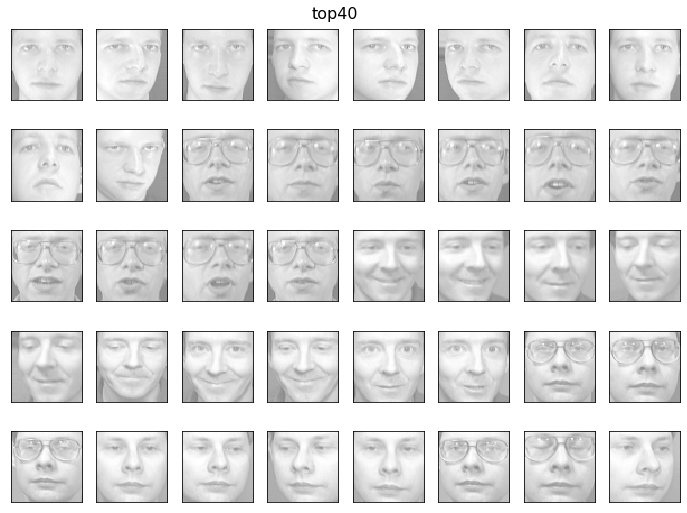

In [ ]:
# the first 40 images in this dataset
IMAGE_SHAPE = (64,64)

def plot_gallery(title,images,n_row,n_col):
    '''
    Plots images on a single figure
    :param title: caption of the figure
    :param images: set of images
    :param n_row: number of rows in the figure
    :param n_col: number of columns in the figure
    :return: the figure
    '''
    plt.figure()
    plt.figure(figsize=(1.5*n_col, 1.5*n_row))
    plt.suptitle(title,size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)
        vmax = max(comp.max(),-comp.min())
        plt.imshow( comp.reshape(IMAGE_SHAPE), cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
        #plt.imshow(comp, cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(bottom=0.05, top=0.95)

plot_gallery("top40", face_data[:40], 5, 8)
plt.show()

<Figure size 432x288 with 0 Axes>

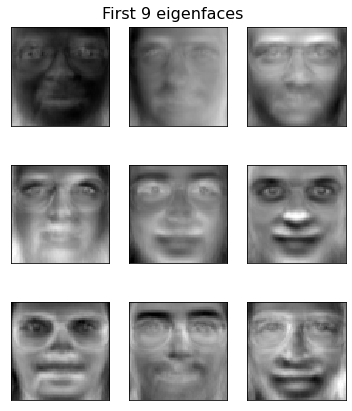

In [ ]:
#eigenfaces
IMAGE_SHAPE = (64,64)
x = face.data

# run PCA:
pca = PCA(n_components=400)
pca.fit(x)
components_eigen_9 = pca.components_


# function plotting the images:
def plot_gallery(title,images,n_row,n_col):
    '''
    Plots images on a single figure
    :param title: caption of the figure
    :param images: set of images
    :param n_row: number of rows in the figure
    :param n_col: number of columns in the figure
    :return: the figure
    '''
    plt.figure()
    plt.figure(figsize=(2*n_col, 2*n_row))
    plt.suptitle(title,size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)
        vmax = max(comp.max(),-comp.min())
        plt.imshow( comp.reshape(IMAGE_SHAPE), cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(bottom=0.05, top=0.95)

plot_gallery("First 9 eigenfaces", components_eigen_9[:9], 3, 3)
plt.show()


explained variance ratio when 1 eigenface is  0.23812726140022278


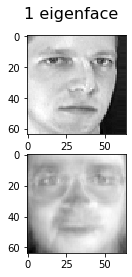

In [ ]:
#rebuild face under different dimentions
#1 eigenface
pca = PCA(n_components=1)
pca.fit(x)
transform_each_1 = pca.transform(x)
components_eigen_1 = pca.components_

plt.suptitle("1 eigenface",size=16)
sample_indx = 1 #np.random.randint(0,len(face.data)) 
#Ture face
plt.subplot(2,1,1)
plt.imshow(face.data[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

#The face rebuilt by using compressed face and eigenfaces
plt.subplot(2,1,2)
rebuild_1 = np.dot(transform_each_1, components_eigen_1)
plt.imshow(rebuild_1[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

print ('explained variance ratio when 1 eigenface is ' , sum(pca.explained_variance_ratio_))

explained variance ratio when 51 eigenface is  0.8754982702666894


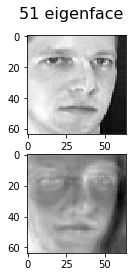

In [ ]:
#51 eigenfaces
pca = PCA(n_components=51)
pca.fit(x)
transform_each_51 = pca.transform(x)
components_eigen_51 = pca.components_
sample_indx = 1 #np.random.randint(0,len(face.data)) 

plt.suptitle("51 eigenface",size=16)
#Ture face
plt.subplot(2,1,1)
plt.imshow(face.data[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

#The face rebuilt by using compressed face and eigenfaces
plt.subplot(2,1,2)
rebuild_51 = np.dot(transform_each_51, components_eigen_51)
plt.imshow(rebuild_51[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

print ('explained variance ratio when 51 eigenface is ' , sum(pca.explained_variance_ratio_))

explained variance ratio when 101 eigenface is  0.9357395818224177


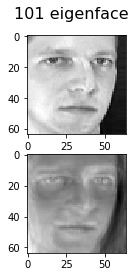

In [ ]:
#101 eigenfaces
pca = PCA(n_components=101)
pca.fit(x)
transform_each_101 = pca.transform(x)
components_eigen_101 = pca.components_
sample_indx = 1 #np.random.randint(0,len(face.data)) 

plt.suptitle("101 eigenface",size=16)
#Ture face
plt.subplot(2,1,1)
plt.imshow(face.data[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

#The face rebuilt by using compressed face and eigenfaces
plt.subplot(2,1,2)
rebuild_101 = np.dot(transform_each_101, components_eigen_101)
plt.imshow(rebuild_101[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

print ('explained variance ratio when 101 eigenface is ' , sum(pca.explained_variance_ratio_))

explained variance ratio when 201 eigenface is  0.9790525759599404


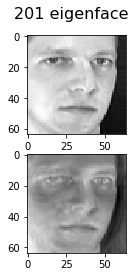

In [ ]:
#201 eigenfaces
pca = PCA(n_components=201)
pca.fit(x)
transform_each_201 = pca.transform(x)
components_eigen_201 = pca.components_
sample_indx = 1 #np.random.randint(0,len(face.data)) 

plt.suptitle("201 eigenface",size=16) 
#Ture face
plt.subplot(2,1,1)
plt.imshow(face.data[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

#The face rebuilt by using compressed face and eigenfaces
plt.subplot(2,1,2)
rebuild_201 = np.dot(transform_each_201, components_eigen_201)
plt.imshow(rebuild_201[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

print ('explained variance ratio when 201 eigenface is ' , sum(pca.explained_variance_ratio_))

explained variance ratio when 400 eigenface is  0.9999999486311496


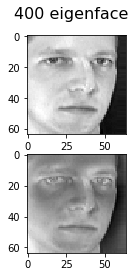

In [ ]:
#400 eigenfaces
pca = PCA(n_components=400)
pca.fit(x)
transform_each_400 = pca.transform(x)
components_eigen_400 = pca.components_
sample_indx = 1 #np.random.randint(0,len(face.data)) 

plt.suptitle("400 eigenface",size=16) 
#Ture face
plt.subplot(2,1,1)
plt.imshow(face.data[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

#The face rebuilt by using compressed face and eigenfaces
plt.subplot(2,1,2)
rebuild_400 = np.dot(transform_each_400, components_eigen_400)
plt.imshow(rebuild_400[sample_indx,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

print ('explained variance ratio when 400 eigenface is ' , sum(pca.explained_variance_ratio_))

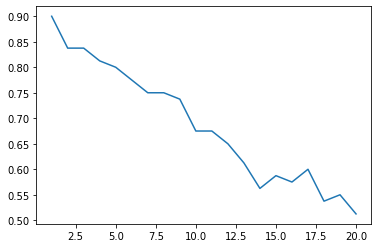

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(x,face.target,test_size = 0.2, random_state=1)
components_pca=pd.DataFrame(columns=["n_components","knn_score"])
for i in range(20):
    pca=PCA(n_components=38,random_state=0).fit(X_train)
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)   
    knn=KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train_pca,y_train)
    knn_predict=knn.predict(X_test_pca)
    components_pca=components_pca.append([{"n_components":i+1,"knn_score":accuracy_score(y_test,knn_predict)}], ignore_index=True)
plt.plot(components_pca["n_components"],components_pca["knn_score"], label = 'knn score')

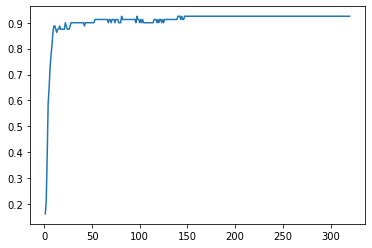

In [99]:
components_pca=pd.DataFrame(columns=["n_components","knn_score"])
for i in range(320):
    pca=PCA(n_components=i+1,random_state=0).fit(X_train)
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)   
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca,y_train)
    knn_predict=knn.predict(X_test_pca)
    components_pca=components_pca.append([{"n_components":i+1,"knn_score":accuracy_score(y_test,knn_predict)}], ignore_index=True)
plt.plot(components_pca["n_components"],components_pca["knn_score"], label = 'knn score')

In [100]:
components_pca[components_pca['knn_score']==components_pca['knn_score'].max()]

,n_components,knn_score
80,81,0.925
96,97,0.925
139,140,0.925
140,141,0.925
141,142,0.925
...,...,...
315,316,0.925
316,317,0.925
317,318,0.925
318,319,0.925
